In [1]:
import pandas as pd

In [2]:
hkprop = pd.read_csv('group4_hkprop.csv')
hkprop.head()

,Unnamed: 0,PROPERTIES PAGE,property_name,area,address,sell_price,rent_price,bedrooms,living_rooms,years,efficiency_ratio
0,0,1,Forfar,Kln Tong / Beacon Hill,"Flat B, High Floor, The Forfar, Forfar, Kln T...",5000,85000,4.0,2.0,9,75.0
1,1,1,King's Park Hill,Homantin/Kingspark,"High Floor, Apt 70 ( Blk 4 ), King's Park Hil...",9800,138000,5.0,2.0,19,68.0
2,2,1,34G Braga Circuit,Kadoorie Hill,"34G Braga Circuit, Kadoorie Hill",3800,56000,3.0,2.0,63,NaN
3,3,1,Beverly Villas,Kln Tong / Beacon Hill,"Flat C, Low Floor, Block 04, Beverly Villas, ...",2380,56000,3.0,2.0,38,93.0
4,4,1,One Mayfair,Kln Tong / Beacon Hill,"Block 7, One Mayfair, Kln Tong / Beacon Hill",4200,56000,3.0,1.0,7,78.0


In [3]:
hkprop.columns

Index(['Unnamed: 0', 'PROPERTIES PAGE', 'property_name', 'area', 'address',
       'sell_price', 'rent_price', 'bedrooms', 'living_rooms', 'years',
       'efficiency_ratio'],
      dtype='object')

In [4]:
hkprop = hkprop.drop(['Unnamed: 0', 'PROPERTIES PAGE'], axis=1)
hkprop['sell_price'] = hkprop['sell_price'] / 100
hkprop.rename(columns={'sell_price':'sell_price_M'}, inplace=True)
hkprop.head()

,property_name,area,address,sell_price_M,rent_price,bedrooms,living_rooms,years,efficiency_ratio
0,Forfar,Kln Tong / Beacon Hill,"Flat B, High Floor, The Forfar, Forfar, Kln T...",50.0,85000,4.0,2.0,9,75.0
1,King's Park Hill,Homantin/Kingspark,"High Floor, Apt 70 ( Blk 4 ), King's Park Hil...",98.0,138000,5.0,2.0,19,68.0
2,34G Braga Circuit,Kadoorie Hill,"34G Braga Circuit, Kadoorie Hill",38.0,56000,3.0,2.0,63,NaN
3,Beverly Villas,Kln Tong / Beacon Hill,"Flat C, Low Floor, Block 04, Beverly Villas, ...",23.8,56000,3.0,2.0,38,93.0
4,One Mayfair,Kln Tong / Beacon Hill,"Block 7, One Mayfair, Kln Tong / Beacon Hill",42.0,56000,3.0,1.0,7,78.0


In [5]:
hkprop.describe()

,sell_price_M,rent_price,bedrooms,living_rooms,years,efficiency_ratio
count,72.000000,72.000000,70.000000,69.000000,72.000000,55.000000
mean,29.741667,47409.722222,3.014286,1.985507,24.986111,78.254545
std,23.696567,34465.365999,0.908779,0.270770,18.395876,6.022237
min,6.800000,20000.000000,1.000000,1.000000,2.000000,61.000000
25%,15.660000,30000.000000,2.250000,2.000000,7.750000,75.000000
50%,20.050000,34000.000000,3.000000,2.000000,19.500000,78.000000
75%,38.000000,50000.000000,3.000000,2.000000,42.250000,80.000000
max,120.000000,200000.000000,6.000000,3.000000,63.000000,93.000000


In [6]:
df = hkprop.dropna()
df.shape

(53, 9)

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


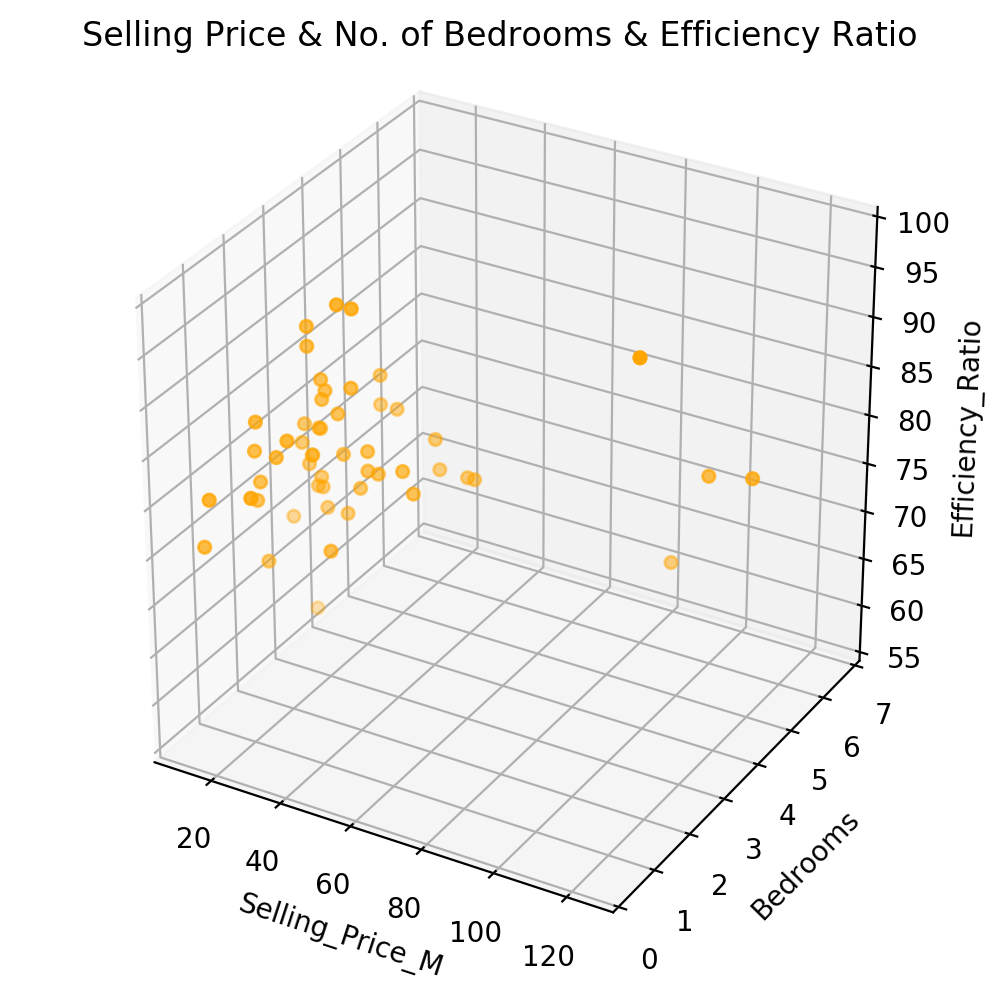

In [8]:
def update_lines(num):
    x = list(df.sell_price_M.values)
    y = list(df.bedrooms.values)
    z = list(df.efficiency_ratio.values)
    graph._offsets3d = (x, y, z)
    return graph

x = [0]
y = [0]
z = [0]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection="3d")
graph = ax.scatter(x, y, z, color='orange')

ax.set_xlim3d(6, 130)
ax.set_ylim3d(0, 7)
ax.set_zlim3d(55, 100)

plt.suptitle('Selling Price & No. of Bedrooms & Efficiency Ratio')
ax.set_xlabel('Selling_Price_M')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Efficiency_Ratio')

# Creating the Animation object
ani = animation.FuncAnimation(fig, update_lines, frames=200, interval=50, blit=False)
plt.tight_layout()